### 1. Data Preprocessing

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
proj_dir = '/content/drive/MyDrive/AI4Science_Public/gold_standard_generation'
os.chdir(proj_dir)
!ls

Mounted at /content/drive
 significant_genes_report_corrected.csv         TCGA.PCPG.sampleMap_HiSeqV2_PANCAN.gz
'TCGA_Bladder_Cancer_(BLCA)'		        TCGA.PCPG.sampleMap_PCPG_clinicalMatrix
 TCGA.BRCA.sampleMap_BRCA_clinicalMatrix        TCGA.SARC.sampleMap_HiSeqV2_PANCAN
 TCGA.BRCA.sampleMap_HiSeqV2_PANCAN	        TCGA.SARC.sampleMap_SARC_clinicalMatrix
'TCGA_Kidney_Clear_Cell_Carcinoma_(KIRC)'       TCGA.THYM.sampleMap_HiSeqV2_PANCAN
'TCGA_Kidney_Papillary_Cell_Carcinoma_(KIRP)'   TCGA.THYM.sampleMap_THYM_clinicalMatrix
'TCGA_Melanoma_(SKCM)'			        TCGA.UCEC.sampleMap_HiSeqV2_PANCAN.gz
 TCGA.MESO.sampleMap_HiSeqV2_PANCAN	        TCGA.UCEC.sampleMap_UCEC_clinicalMatrix
 TCGA.MESO.sampleMap_MESO_clinicalMatrix        TCGA.UCS.sampleMap_HiSeqV2_PANCAN.gz
'TCGA_Ocular_melanomas_(UVM)'		        TCGA.UCS.sampleMap_UCS_clinicalMatrix


In [2]:
!pip install sparse_lmm

In [3]:
# Read file

import pandas as pd
import numpy as np

clinical_data = pd.read_csv('TCGA.BRCA.sampleMap_BRCA_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('TCGA.BRCA.sampleMap_HiSeqV2_PANCAN', sep='\t', index_col=0)

In [4]:
clinical_data.head()

,AJCC_Stage_nature2012,Age_at_Initial_Pathologic_Diagnosis_nature2012,CN_Clusters_nature2012,Converted_Stage_nature2012,Days_to_Date_of_Last_Contact_nature2012,Days_to_date_of_Death_nature2012,ER_Status_nature2012,Gender_nature2012,HER2_Final_Status_nature2012,Integrated_Clusters_no_exp__nature2012,...,_GENOMIC_ID_TCGA_BRCA_mutation_wustl_gene,_GENOMIC_ID_TCGA_BRCA_miRNA_GA,_GENOMIC_ID_TCGA_BRCA_exp_HiSeqV2_percentile,_GENOMIC_ID_data/public/TCGA/BRCA/miRNA_GA_gene,_GENOMIC_ID_TCGA_BRCA_gistic2thd,_GENOMIC_ID_data/public/TCGA/BRCA/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_BRCA_G4502A_07_3,_GENOMIC_ID_TCGA_BRCA_exp_HiSeqV2,_GENOMIC_ID_TCGA_BRCA_gistic2,_GENOMIC_ID_TCGA_BRCA_PDMarray
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6ef883fc-81f3-4089-95e0-86904ffc0d38,NaN,TCGA-3C-AAAU-01A-11D-A41E-01,TCGA-3C-AAAU-01,NaN,6ef883fc-81f3-4089-95e0-86904ffc0d38,TCGA-3C-AAAU-01A-11D-A41E-01,NaN
TCGA-3C-AALI-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,dd8d3665-ec9d-45be-b7b9-a85dac3585e2,NaN,TCGA-3C-AALI-01A-11D-A41E-01,TCGA-3C-AALI-01,NaN,dd8d3665-ec9d-45be-b7b9-a85dac3585e2,TCGA-3C-AALI-01A-11D-A41E-01,NaN
TCGA-3C-AALJ-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,c924c2a8-ab41-4499-bb30-79705cc17d45,NaN,TCGA-3C-AALJ-01A-31D-A41E-01,TCGA-3C-AALJ-01,NaN,c924c2a8-ab41-4499-bb30-79705cc17d45,TCGA-3C-AALJ-01A-31D-A41E-01,NaN
TCGA-3C-AALK-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1a19e068-d213-41ef-aebb-104017a883cc,NaN,TCGA-3C-AALK-01A-11D-A41E-01,TCGA-3C-AALK-01,NaN,1a19e068-d213-41ef-aebb-104017a883cc,TCGA-3C-AALK-01A-11D-A41E-01,NaN
TCGA-4H-AAAK-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2ea9e472-a408-4ae0-975d-50a566f22b2a,NaN,TCGA-4H-AAAK-01A-12D-A41E-01,TCGA-4H-AAAK-01,NaN,2ea9e472-a408-4ae0-975d-50a566f22b2a,TCGA-4H-AAAK-01A-12D-A41E-01,NaN


In [5]:
gene_data.head()

,TCGA-AR-A5QQ-01,TCGA-D8-A1JA-01,TCGA-BH-A0BQ-01,TCGA-BH-A0BT-01,TCGA-A8-A06X-01,TCGA-A8-A096-01,TCGA-BH-A0C7-01,TCGA-AC-A5XU-01,TCGA-PE-A5DE-01,TCGA-PE-A5DC-01,...,TCGA-A7-A13E-11,TCGA-C8-A8HP-01,TCGA-E9-A5FL-01,TCGA-AC-A2FB-11,TCGA-E2-A15F-01,TCGA-A2-A3XT-01,TCGA-B6-A0X7-01,TCGA-BH-A1EV-11,TCGA-3C-AALJ-01,TCGA-B6-A0X1-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,-0.356592,-2.429392,-0.542392,-0.844192,-0.222292,-0.097492,0.229108,-0.711592,0.075808,-0.235292,...,-0.237492,0.318608,0.055908,0.045008,0.169408,1.650408,0.710508,-0.459192,1.082808,0.452408
HIF3A,-3.976026,-1.894026,-2.832326,-4.213326,-4.972826,-5.280926,-1.945726,-5.080926,-2.616926,-1.441126,...,2.599874,-3.338826,-1.690226,2.632474,-4.671126,-4.237826,-1.485126,1.698974,-4.623726,-3.135626
RNF17,-0.531035,0.093465,0.021565,-0.531035,-0.531035,0.345465,-0.531035,-0.531035,-0.531035,-0.531035,...,-0.531035,-0.531035,3.199465,-0.531035,-0.531035,0.601865,-0.105235,-0.531035,-0.531035,-0.531035
RNF10,-0.409972,0.140528,0.188928,1.410528,0.226028,0.034228,-0.395572,-0.277172,0.427928,0.353628,...,0.209328,0.487728,0.703928,0.048728,0.235928,-0.195772,0.088728,-0.231572,0.484028,0.379428
RNF11,0.161322,2.559422,0.442622,0.123222,0.286622,-0.112478,-0.201578,-0.532078,0.253122,-0.166578,...,0.966522,0.443822,-0.477678,0.607522,-0.130878,-0.694278,-0.203478,0.909522,-0.183678,0.274122


In [6]:
# Set Basic info

#gene_fullname = 'BRCA gene'
#gene = 'brca'
trait = 'Breast Cancer'
condition = 'underweight'
condition_col = 'initial_weight'

gene_list = gene_data.index.tolist()
# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_list)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')

The clinical dataset has 193 features, and the gene dataset includes 20530 genes


In [7]:
# Merge clinical_data and gene_data on their indices - sample_ID, corresponding to each person
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,AJCC_Stage_nature2012,Age_at_Initial_Pathologic_Diagnosis_nature2012,CN_Clusters_nature2012,Converted_Stage_nature2012,Days_to_Date_of_Last_Contact_nature2012,Days_to_date_of_Death_nature2012,ER_Status_nature2012,Gender_nature2012,HER2_Final_Status_nature2012,Integrated_Clusters_no_exp__nature2012,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.748878,0.565583,-0.767233,-1.28139,-0.271377,-0.492286,0.360373,1.067905,0.076267,-0.392212
TCGA-3C-AALI-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.312922,0.079683,0.475267,1.99661,0.161423,0.273714,0.644673,-0.428695,0.068667,-0.043812
TCGA-3C-AALJ-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.748878,-0.656117,-0.216733,0.21081,0.101023,0.660514,1.295073,0.915105,0.168567,0.047788
TCGA-3C-AALK-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.415422,-0.178417,-0.211233,-1.28139,0.108023,1.132814,0.496773,0.240105,3.099767,0.112888
TCGA-4H-AAAK-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.685222,-0.698717,-0.484233,-1.28139,-0.223577,1.222714,0.225573,-0.301995,0.200067,-0.080212


In [8]:
# Only select relevant columns

#input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
feature_cols = [condition_col] + gene_list
merged_data = merged_data[feature_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,initial_weight,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU-01,60.0,0.607308,-3.194126,-0.531035,-0.145872,0.237422,-0.29921,-0.142694,-0.217446,0.333001,...,-0.748878,0.565583,-0.767233,-1.28139,-0.271377,-0.492286,0.360373,1.067905,0.076267,-0.392212
TCGA-3C-AALI-01,120.0,-0.641192,-4.928226,0.095465,0.098128,-0.541978,-0.32291,-0.044694,-0.148846,1.841601,...,0.312922,0.079683,0.475267,1.99661,0.161423,0.273714,0.644673,-0.428695,0.068667,-0.043812
TCGA-3C-AALK-01,140.0,0.121608,-2.881526,-0.531035,0.179128,0.039222,-0.45491,0.180306,0.775554,-0.423399,...,0.415422,-0.178417,-0.211233,-1.28139,0.108023,1.132814,0.496773,0.240105,3.099767,0.112888
TCGA-4H-AAAK-01,770.0,0.420208,-3.282726,-0.531035,-0.020972,-0.117978,-0.55781,-0.173794,-1.079146,0.465001,...,0.685222,-0.698717,-0.484233,-1.28139,-0.223577,1.222714,0.225573,-0.301995,0.200067,-0.080212
TCGA-5L-AAT0-01,80.0,0.474808,-2.775226,-0.531035,0.246028,-0.378378,-0.83081,0.338906,1.247754,0.242501,...,-0.748878,0.589083,0.726267,-1.28139,-0.622577,1.212114,0.976973,0.301305,2.843667,0.138388


In [9]:
# Decode the trait information from Sample IDs. Tumor types range from 01 - 09, normal types from 10 - 19.
# Create a function to check the last two digits of a row index

def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1

# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

<ipython-input-9-5d3c2de001cb>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)


,initial_weight,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Breast Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU-01,60.0,0.607308,-3.194126,-0.531035,-0.145872,0.237422,-0.29921,-0.142694,-0.217446,0.333001,...,0.565583,-0.767233,-1.28139,-0.271377,-0.492286,0.360373,1.067905,0.076267,-0.392212,1
TCGA-3C-AALI-01,120.0,-0.641192,-4.928226,0.095465,0.098128,-0.541978,-0.32291,-0.044694,-0.148846,1.841601,...,0.079683,0.475267,1.99661,0.161423,0.273714,0.644673,-0.428695,0.068667,-0.043812,1
TCGA-3C-AALK-01,140.0,0.121608,-2.881526,-0.531035,0.179128,0.039222,-0.45491,0.180306,0.775554,-0.423399,...,-0.178417,-0.211233,-1.28139,0.108023,1.132814,0.496773,0.240105,3.099767,0.112888,1
TCGA-4H-AAAK-01,770.0,0.420208,-3.282726,-0.531035,-0.020972,-0.117978,-0.55781,-0.173794,-1.079146,0.465001,...,-0.698717,-0.484233,-1.28139,-0.223577,1.222714,0.225573,-0.301995,0.200067,-0.080212,1
TCGA-5L-AAT0-01,80.0,0.474808,-2.775226,-0.531035,0.246028,-0.378378,-0.83081,0.338906,1.247754,0.242501,...,0.589083,0.726267,-1.28139,-0.622577,1.212114,0.976973,0.301305,2.843667,0.138388,1


### 2. Preliminary analysis

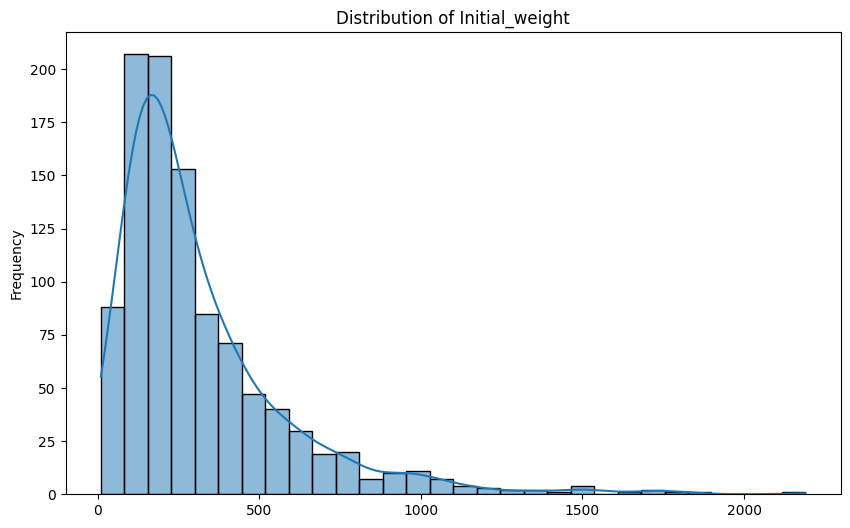

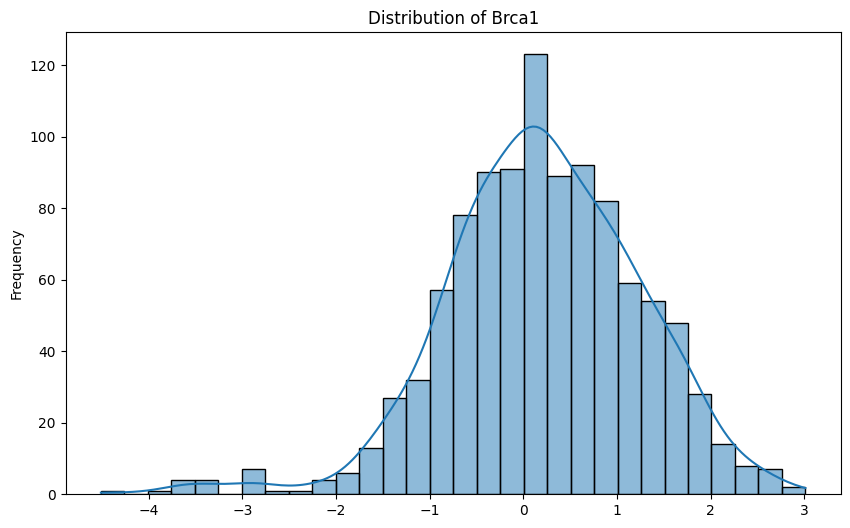

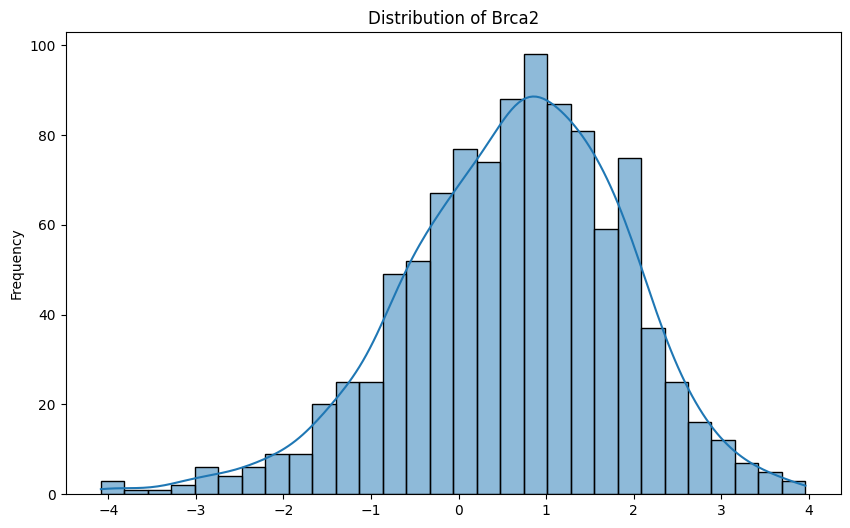

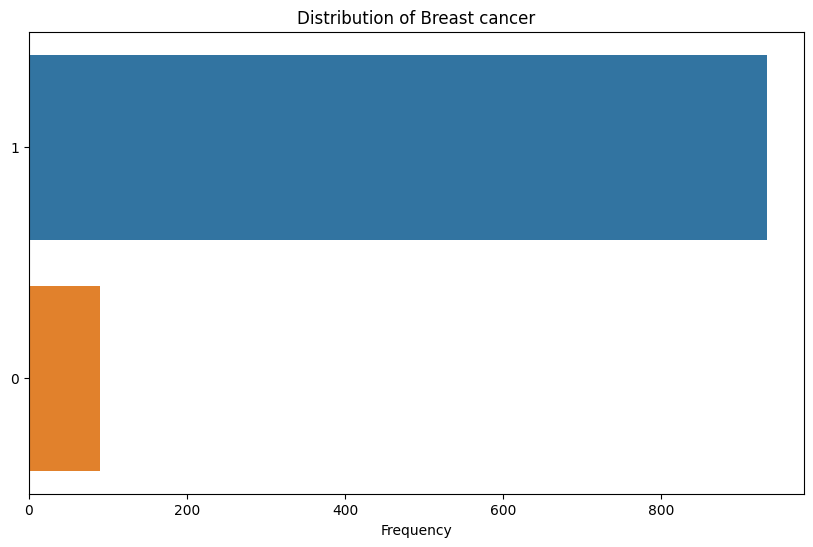

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# For example, we may want to choose a few genes we are interested in for visualization:
interested_genes = [col for col in gene_list if 'brca' in col.lower()]
analyze_distributions(merged_data, numerical_columns=[condition_col, *interested_genes], categorical_columns=[trait])

In [11]:
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
feature_cols = merged_data.columns.tolist()[:-1]

merged_data.head()

,underweight,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Breast Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU-01,0,0.607308,-3.194126,-0.531035,-0.145872,0.237422,-0.29921,-0.142694,-0.217446,0.333001,...,0.565583,-0.767233,-1.28139,-0.271377,-0.492286,0.360373,1.067905,0.076267,-0.392212,1
TCGA-3C-AALI-01,0,-0.641192,-4.928226,0.095465,0.098128,-0.541978,-0.32291,-0.044694,-0.148846,1.841601,...,0.079683,0.475267,1.99661,0.161423,0.273714,0.644673,-0.428695,0.068667,-0.043812,1
TCGA-3C-AALK-01,0,0.121608,-2.881526,-0.531035,0.179128,0.039222,-0.45491,0.180306,0.775554,-0.423399,...,-0.178417,-0.211233,-1.28139,0.108023,1.132814,0.496773,0.240105,3.099767,0.112888,1
TCGA-4H-AAAK-01,-2,0.420208,-3.282726,-0.531035,-0.020972,-0.117978,-0.55781,-0.173794,-1.079146,0.465001,...,-0.698717,-0.484233,-1.28139,-0.223577,1.222714,0.225573,-0.301995,0.200067,-0.080212,1
TCGA-5L-AAT0-01,0,0.474808,-2.775226,-0.531035,0.246028,-0.378378,-0.83081,0.338906,1.247754,0.242501,...,0.589083,0.726267,-1.28139,-0.622577,1.212114,0.976973,0.301305,2.843667,0.138388,1


### 3. Do regression & Cross Validation

In [12]:
import pandas as pd
from sparse_lmm import VariableSelection

def preprocess_data(X_train, X_test=None):
    # Normalize training data
    mean_train = np.mean(X_train, axis=0)
    std_train = np.std(X_train, axis=0)

    X_train_normalized = (X_train - mean_train) / std_train

    # Set columns with zero std to zero for training data
    zero_std_columns_train = np.where(std_train == 0)[0]
    X_train_normalized[:, zero_std_columns_train] = 0

    if X_test is not None:
        # Normalize test data using training data's mean and std
        X_test_normalized = (X_test - mean_train) / std_train
        X_test_normalized[:, zero_std_columns_train] = 0
    else:
        X_test_normalized = None

    return X_train_normalized, X_test_normalized


In [13]:
def cross_validation(X, y, k=5):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Preprocess the train and test data
        X_train, X_test = preprocess_data(X_train, X_test)

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies), np.std(accuracies)

# Select relevant columns and convert to numpy array
y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

cv_mean, cv_std = cross_validation(X, y)
print(f'The cross-validation accuracy is {(cv_mean * 100):.2f}% ± {(cv_std * 100):.2f}%')

<ipython-input-12-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
<ipython-input-12-abef56c5c9ec>:17: RuntimeWarning: invalid value encountered in divide
  X_test_normalized = (X_test - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
/usr/local/lib/python3.10/dist-packages/sparse_lmm/VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


The cross-validation accuracy is 88.74% ± 0.99%


In [14]:
# Conduct regression on the whole dataset
# Instantiate the VariableSelection class
var_select = VariableSelection()

y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

X, _ = preprocess_data(X)
# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
p_values = [np.exp(-p) for p in nlog_p_values]

<ipython-input-12-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
/usr/local/lib/python3.10/dist-packages/sparse_lmm/VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


In [15]:
# Conduct regression on the whole dataset

var_select = VariableSelection()

y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

X, _ = preprocess_data(X)
# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
p_values = [np.exp(-p) for p in nlog_p_values]

<ipython-input-12-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
/usr/local/lib/python3.10/dist-packages/sparse_lmm/VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


### 4. Discussion

In [16]:
import pandas as pd
from statsmodels.stats.multitest import multipletests


# Create a DataFrame for the regression results
regression_df = pd.DataFrame({
    'Variable': feature_cols,
    'Coefficient': coefficients,
    'p_value': p_values
})

# Extract information about the lifestyle condition's effect
condition_effect = regression_df.iloc[0]

# Report the effect of the lifestyle condition
print(f"Effect of the condition on the target variable:")
print(f"Variable: {condition}")
print(f"Coefficient: {condition_effect['Coefficient']:.4f}")
print(f"p-value: {condition_effect['p_value']:.4g}\n")

Effect of the condition on the target variable:
Variable: underweight
Coefficient: -0.0073
p-value: 0.05833



In [17]:
threshold = 0.05
# Apply the Benjamini-Hochberg correction
rejected, corrected_p_values, _, _ = multipletests(regression_df['p_value'][1:], alpha=threshold, method='fdr_bh')

# Add the corrected p-values to the DataFrame (ignoring the first row which is the condition)
regression_df.loc[1:, 'corrected_p_value'] = corrected_p_values

# Now filter based on the corrected p-values
significant_genes = regression_df.loc[(regression_df.index > 0) & (regression_df['corrected_p_value'] < threshold)]
significant_genes_sorted = significant_genes.sort_values('corrected_p_value')

# Print and/or save your results as before
print(f"Genes with corrected p-value < {threshold}, affecting the trait {trait} conditional on the factor {condition}, sorted by corrected p-value:")
print(significant_genes_sorted[['Variable', 'Coefficient', 'corrected_p_value']].to_string(index=False))
print(f"\nFound {len(significant_genes_sorted)} significant genes with corrected p-value < {threshold}")
# Save this to a CSV file
significant_genes_sorted.to_csv('significant_genes_report_corrected.csv', index=False)

Genes with corrected p-value < 0.05, affecting the trait Breast Cancer conditional on the factor underweight, sorted by corrected p-value:
    Variable  Coefficient  corrected_p_value
   SNORD103A    -0.456012       0.000000e+00
    SNORA11C    -0.456012       0.000000e+00
      TTTY3B     0.456012       0.000000e+00
     DEFB116    -0.456012       0.000000e+00
     DEFB114     0.456012       0.000000e+00
     DEFB112    -0.456012       0.000000e+00
    SNORA70C    -0.456012       0.000000e+00
       TSSK2     0.456012       0.000000e+00
     SNORD46    -0.456012       0.000000e+00
     RBMY2EP    -0.456012       0.000000e+00
      TTTY22     0.456012       0.000000e+00
      TTTY6B    -0.456012       0.000000e+00
     SNORD90    -0.456012       0.000000e+00
     DEFB122     0.456012       0.000000e+00
      SNAR-D    -0.456012       0.000000e+00
      PRR20B     0.456012       0.000000e+00
      TTTY12     0.456012       0.000000e+00
       LCE3B     0.456012       0.000000e+00
      